# Simplification

From the [SymPy docs](https://docs.sympy.org/latest/tutorial/simplification.html)

In [1]:
from sympy import *

In [2]:
x, y, z = symbols('x y z')

In [3]:
init_printing(use_unicode=True)

The function `simplify()` uses heuristics to determine the simplest result:

In [4]:
simplify(sin(x)**2 + cos(x)**2)

In [5]:
simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

In [6]:
simplify(gamma(x)/gamma(x - 2))

## Polynomial/Rational Function Simplification

Given a polynomial, `expand()` will put it into a canonical form of a sum of monomials.

In [7]:
expand((x + 1)**2)

In [8]:
expand((x + 2)*(x - 3))

In [9]:
expand((x + 1)*(x - 2) - (x - 1)*x)

`factor()` takes a polynomial and factors it into irreducible factors over the rational numbers.

In [10]:
factor(x**3 - x**2 + x - 1)

In [11]:
factor(x**2*z + 4*x*y*z + 4*y**2*z)

In [12]:
factor_list(x**2*z + 4*x*y*z + 4*y**2*z)

In [13]:
expand((cos(x) + sin(x))**2)

In [14]:
factor(cos(x)**2 + 2*cos(x)*sin(x) + sin(x)**2)

`collect()` collects common powers of a term in an expression.

In [15]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3

In [16]:
expr

In [17]:
collected_expr = collect(expr, x)

In [18]:
collected_expr

In [19]:
collected_expr.coeff(x, 2)

`cancel()` will take any rational function and put it into the standard canonical form, $\frac{p}{q}$, where p and q are expanded polynomials with no common factors, and the leading coefficients of p and q do not have denominators (i.e., are integers).

In [20]:
cancel((x**2 + 2*x + 1)/(x**2 + x))

In [21]:
expr = 1/x + (3*x/2 - 2)/(x - 4)

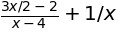

In [22]:
expr

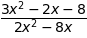

In [23]:
cancel(expr)

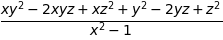

In [24]:
expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)
expr

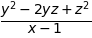

In [25]:
cancel(expr)

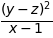

In [26]:
factor(expr)

`apart()` performs a [partial fraction decomposition](http://en.wikipedia.org/wiki/Partial_fraction_decomposition) on a rational function.

In [27]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)

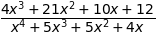

In [28]:
expr

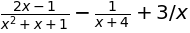

In [29]:
apart(expr)

## Trigonometric Simplification

In [30]:
trigsimp(sin(x)**2 + cos(x)**2)

In [31]:
trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

In [32]:
trigsimp(sin(x)*tan(x)/sec(x))

In [33]:
trigsimp(cosh(x)**2 + sinh(x)**2)

In [34]:
trigsimp(sinh(x)/tanh(x))

To expand trigonometric functions, that is, apply the sum or double angle identities, use `expand_trig()`.

In [35]:
expand_trig(sin(x + y))

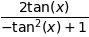

In [36]:
expand_trig(tan(2*x))

In [37]:
trigsimp(sin(x)*cos(y) + sin(y)*cos(x))

## Powers

There are three kinds of identities satisfied by exponents:

1. $x^a x^b = x^{a+b}$
2. $x^a y^a = (xy)^a$
3. $(x^a)^b = x^{ab}$

`powsimp()` applies identities 1 and 2, from left to right.

In [40]:
x, y = symbols('x y', positive=True)
a, b = symbols('a b', real=True)
z, t, c = symbols('z t c')

In [41]:
powsimp(x**a*x**b)

In [42]:
powsimp(x**a*y**a)

`expand_power_exp()` and `expand_power_base()` apply identities 1 and 2 from right to left, respectively.

In [43]:
expand_power_exp(x**(a + b))

In [44]:
expand_power_base((x*y)**a)

`powdenest()` applies identity 3, from left to right.

In [45]:
powdenest((x**a)**b)

## Exponentials and logarithms

Logarithms have similar issues as powers. There are two main identities:

1. $\log(xy)=\log(x)+\log(y)$
2. $\log(x^n)= n \log(x)$

In [47]:
x, y = symbols('x y', positive=True)
n = symbols('n', real=True)

To apply identities 1 and 2 from left to right, use `expand_log()`. As always, the identities will not be applied unless they are valid.

In [48]:
expand_log(log(x*y))

In [49]:
expand_log(log(x/y))

In [50]:
expand_log(log(x**2))

In [51]:
expand_log(log(x**n))

In [52]:
expand_log(log(z*t))

To apply identities 1 and 2 from right to left, use `logcombine()`.

In [53]:
logcombine(log(x) + log(y))

## Some Special Functions

In [54]:
x, y, z = symbols('x y z')
k, m, n = symbols('k m n')

In [55]:
factorial(n)

In [56]:
binomial(n, k)

In [57]:
gamma(z)

In [58]:
hyper([1, 2], [3], z)

 ┌─  ⎛1, 2 │  ⎞
 ├─  ⎜     │ z⎟
2╵ 1 ⎝ 3   │  ⎠

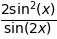

In [59]:
tan(x).rewrite(sin)

In [60]:
factorial(x).rewrite(gamma)

In [61]:
expand_func(gamma(x + 3))

In [62]:
hyperexpand(hyper([1, 1], [2], z))

In [63]:
expr = meijerg([[1],[1]], [[1],[]], -z)
expr

╭─╮1, 1 ⎛1  1 │   ⎞
│╶┐     ⎜     │ -z⎟
╰─╯2, 1 ⎝1    │   ⎠

In [64]:
hyperexpand(expr)

In [65]:
n, k = symbols('n k', integer = True)
combsimp(factorial(n)/factorial(n - 3))

In [66]:
combsimp(binomial(n+1, k+1)/binomial(n, k))

In [67]:
gammasimp(gamma(x)*gamma(1 - x))